<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/Copy_of_W9D4_dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [2]:
# TODO : Import the Data from the kaggle API

from google.colab import files
files.upload()  # Upload kaggle.json here


Saving AB_Test_Results.csv to AB_Test_Results.csv


{'AB_Test_Results.csv': b'USER_ID,VARIANT_NAME,REVENUE\n737,variant,0.0\n2423,control,0.0\n9411,control,0.0\n7311,control,0.0\n6174,variant,0.0\n2380,variant,0.0\n2849,control,0.0\n9168,control,0.0\n6205,variant,0.0\n7548,control,0.0\n8395,control,0.0\n1184,control,0.0\n7165,control,0.0\n2529,variant,2.15\n3489,variant,0.0\n8406,variant,0.0\n7549,variant,0.0\n9085,variant,0.0\n4572,variant,0.0\n8927,variant,0.0\n3383,variant,0.0\n6588,variant,0.0\n6226,variant,0.0\n425,variant,0.0\n4772,variant,0.0\n598,variant,0.0\n3614,variant,0.0\n2667,control,0.0\n3153,control,0.0\n7951,control,0.0\n7257,control,0.0\n3610,control,0.0\n7296,control,0.0\n5599,variant,0.0\n8281,variant,0.0\n2653,control,0.0\n3336,control,0.0\n8275,control,0.0\n6025,variant,0.0\n5171,control,0.0\n4303,control,0.0\n7539,control,0.0\n2073,control,0.0\n8796,control,0.0\n8971,variant,0.0\n4064,control,0.0\n3354,control,0.0\n5142,control,0.0\n1145,variant,0.0\n6429,control,3.25\n9234,variant,0.0\n8976,variant,0.0\n7928,cont

# Data Understanding

In [6]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

# Basic DataFrame info
print("DataFrame info:")
df.info()

# List columns
print("\nColumns in DataFrame:")
print(df.columns.tolist())

# Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Descriptive statistics for numeric columns
print("\nDescriptive statistics:")
print(df.describe())

# Value counts for VARIANT_NAME
print("\nValue counts for VARIANT_NAME:")
print(df['VARIANT_NAME'].value_counts())

# Count of unique users
unique_users = df['USER_ID'].nunique()
print(f"\nNumber of unique users: {unique_users}")


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

Columns in DataFrame:
['USER_ID', 'VARIANT_NAME', 'REVENUE']

Missing values per column:
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

Descriptive statistics:
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

Value counts for VARIANT_NAME:
VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

Number

# Average Revenue by VARIANT_NAME

In [7]:
#TODO

average_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()
print(average_revenue)


  VARIANT_NAME   REVENUE
0      control  0.129013
1      variant  0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [5]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

import pandas as pd

# Load the dataset, update the file path if needed
df = pd.read_csv('AB_Test_Results.csv')

# Now run the Shapiro-Wilk test code
from scipy.stats import shapiro

control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

stat_control, p_control = shapiro(control_revenue)
stat_variant, p_variant = shapiro(variant_revenue)

print(f"Control group: Shapiro-Wilk p-value = {p_control:.6f}")
print(f"Variant group: Shapiro-Wilk p-value = {p_variant:.6f}")



Control group: Shapiro-Wilk p-value = 0.000000
Variant group: Shapiro-Wilk p-value = 0.000000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

from scipy.stats import levene

stat_levene, p_levene = levene(control_revenue, variant_revenue)
print(f"Levene's test p-value = {p_levene:.6f}")

if p_levene < 0.05:
    print("Variances are significantly different (homogeneity of variance violated).")
else:
    print("Variances are equal (homogeneity of variance assumed).")


Levene's test p-value = 0.203700
Variances are equal (homogeneity of variance assumed).


# Non-Parametric Test (mannwhitneyu Test)

In [9]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

from scipy.stats import mannwhitneyu

stat_mw, p_mw = mannwhitneyu(control_revenue, variant_revenue, alternative='two-sided')
print(f"Mann-Whitney U test p-value = {p_mw:.6f}")

if p_mw < 0.05:
    print("Significant difference in revenue between control and variant groups.")
else:
    print("No significant difference in revenue between control and variant groups.")


Mann-Whitney U test p-value = 0.478252
No significant difference in revenue between control and variant groups.


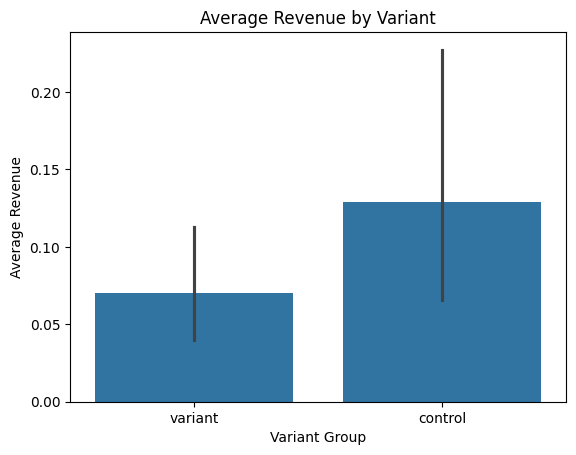

In [10]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='VARIANT_NAME', y='REVENUE', data=df)
plt.title('Average Revenue by Variant')
plt.ylabel('Average Revenue')
plt.xlabel('Variant Group')
plt.show()


In [4]:
df = pd.read_csv('AB_Test_Results.csv')